In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [64]:
data_train = pd.read_csv('./train.csv')
data_test_a = pd.read_csv('./testA.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [5]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [9]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

In [10]:
set(data_train.columns)-set(data_test_a.columns)

{'isDefault'}

---
### NA data

Columns with NA data

In [6]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


Features with a missing rate greater than 50%

In [7]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

fea_null_moreThanHalf

{}

Visualization

<Axes: >

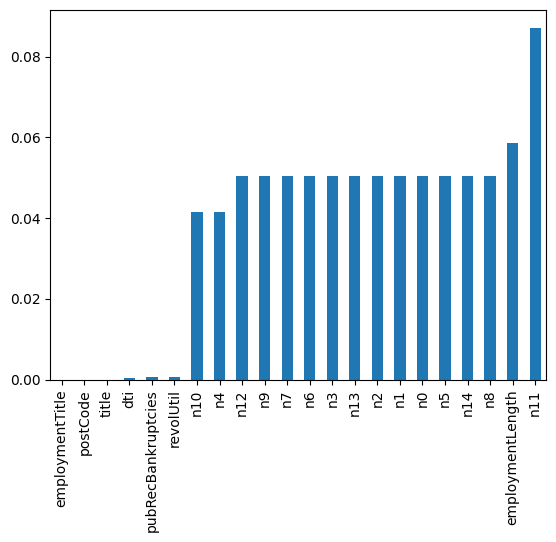

In [ ]:
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Features with unique value:

In [10]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea

['policyCode']

In [11]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]
one_value_fea_test

['policyCode']

In [12]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


columns with 'obeject' type

In [13]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [14]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [15]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

find serial features and non serial features

In [32]:
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [33]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [34]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [39]:
for col in numerical_noserial_fea:
    print("="*20)
    print(f"Feature:{col}")
    print(data_train[col].value_counts())


Feature:term
term
3    606902
5    193098
Name: count, dtype: int64
Feature:homeOwnership
homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: count, dtype: int64
Feature:verificationStatus
verificationStatus
1    309810
2    248968
0    241222
Name: count, dtype: int64
Feature:isDefault
isDefault
0    640390
1    159610
Name: count, dtype: int64
Feature:initialListStatus
initialListStatus
0    466438
1    333562
Name: count, dtype: int64
Feature:applicationType
applicationType
0    784586
1     15414
Name: count, dtype: int64
Feature:policyCode
policyCode
1.0    800000
Name: count, dtype: int64
Feature:n11
n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: count, dtype: int64
Feature:n12
n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: count, dtype: int64


'policyCode' has only one value.

'n11','n12' are special

For serial features:

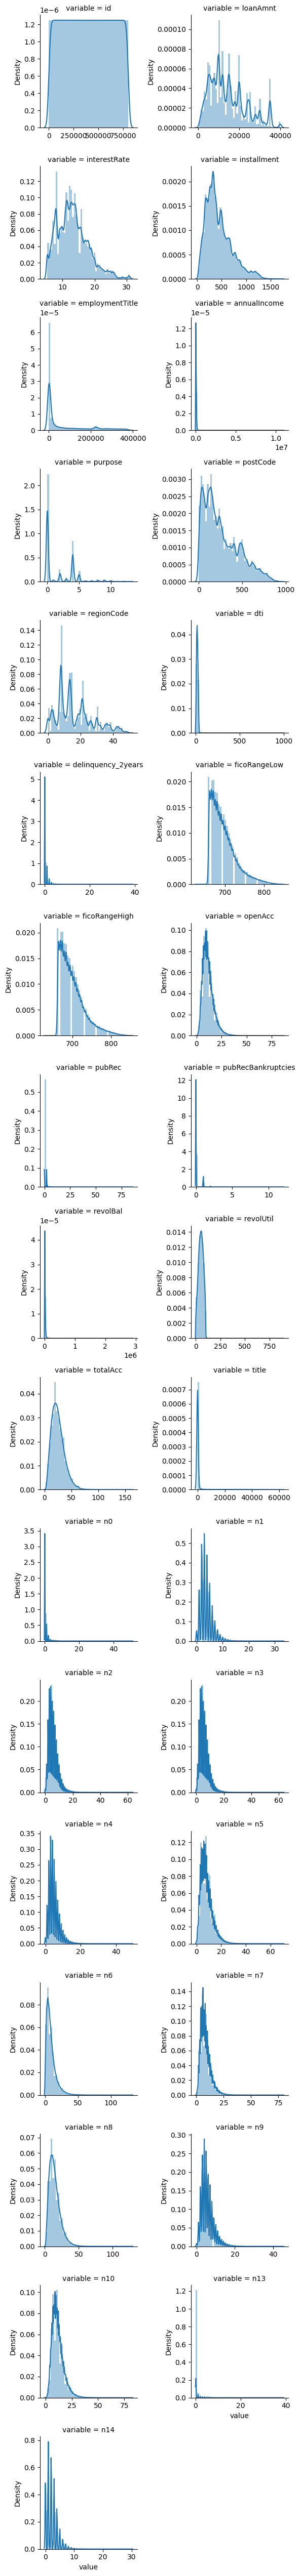

In [40]:
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Text(0, 0.5, 'Probability')

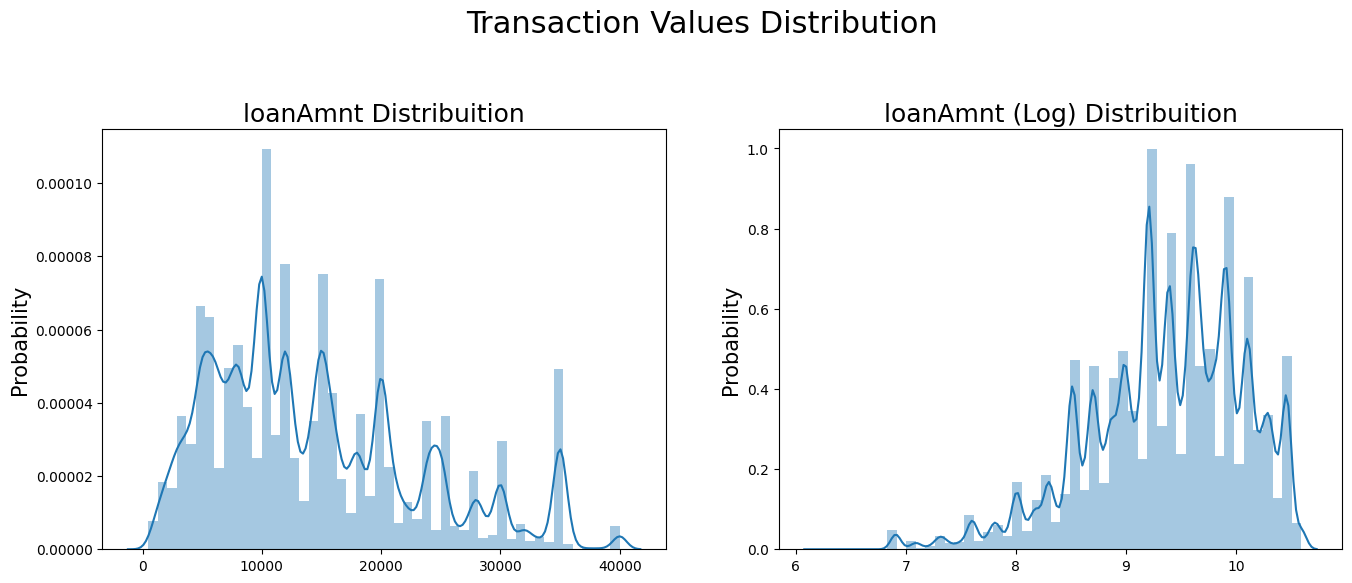

In [41]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

Non-numerical features:

In [43]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

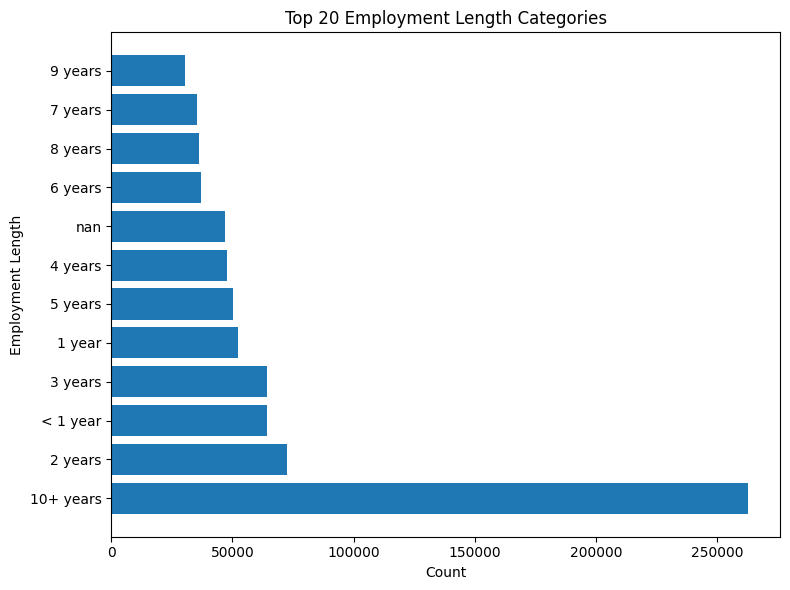

In [ ]:
emp_counts = data_train["employmentLength"].value_counts(dropna=False)

plt.figure(figsize=(8, 6))
plt.barh(emp_counts.index.astype(str), emp_counts.values) 
plt.xlabel("Count")
plt.ylabel("Employment Length")
plt.title("Top 20 Employment Length Categories")
plt.tight_layout()
plt.show()

In [50]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

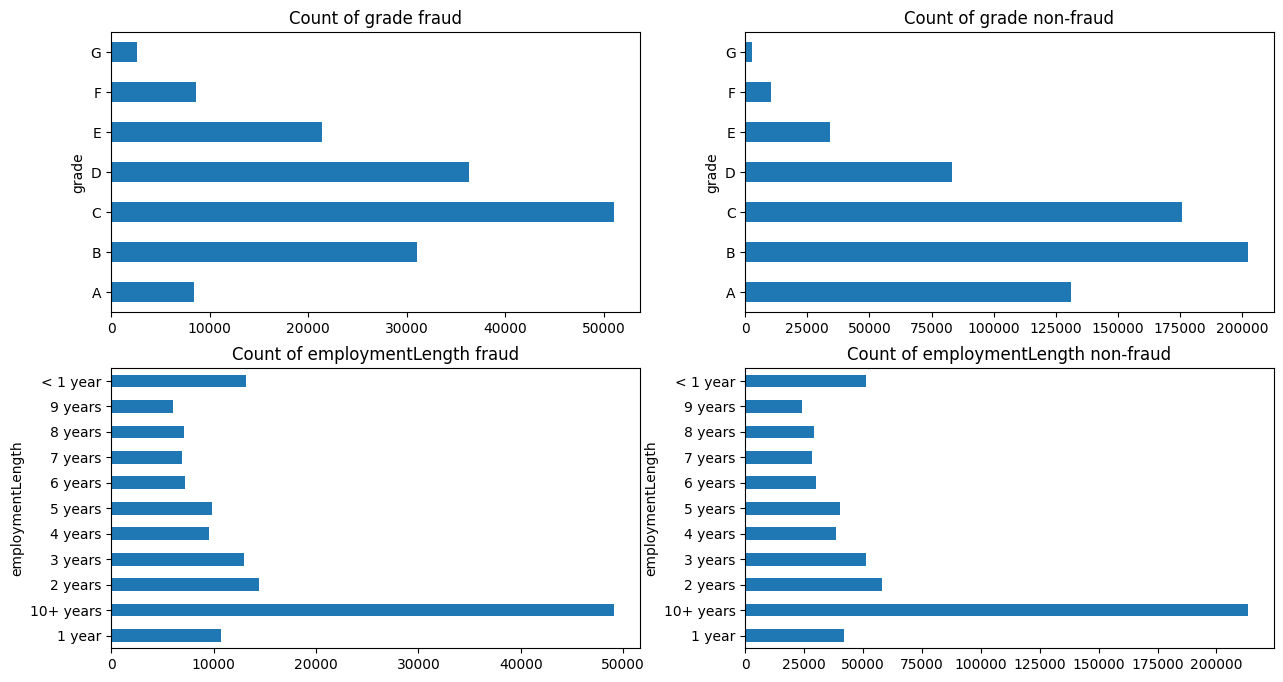

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

<Axes: title={'center': 'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

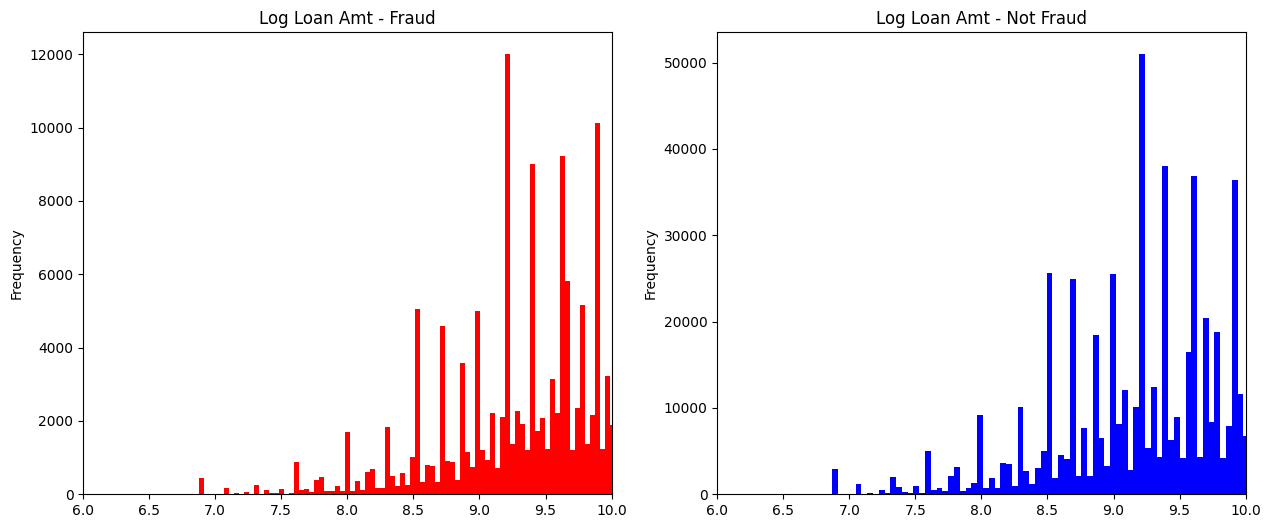

In [60]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
train_loan_fr['loanAmnt'].apply(np.log).plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(6, 10),
         ax= ax1)
train_loan_nofr['loanAmnt'].apply(np.log) .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(6, 10),
         ax=ax2)

Time data

In [65]:
data_train['issueDate']=pd.to_datetime(data_train['issueDate'])
startdate=data_train['issueDate'].min()
data_train['issueDays_since_start'] = (data_train['issueDate']-startdate).dt.days

In [69]:
data_test_a['issueDate']=pd.to_datetime(data_test_a['issueDate'])
data_test_a['issueDays_since_start'] = (data_test_a['issueDate']-startdate).dt.days

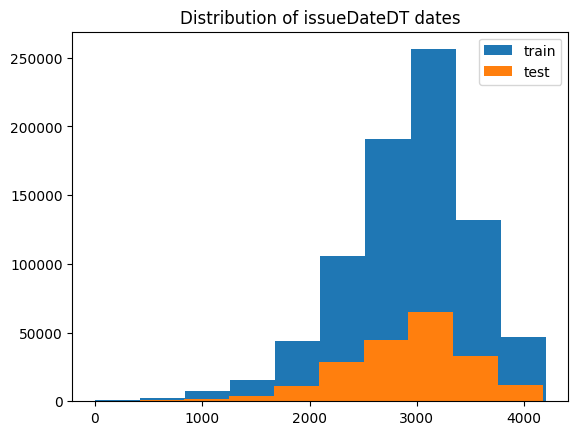

In [ ]:
plt.hist(data_train['issueDays_since_start'], label='train');
plt.hist(data_test_a['issueDays_since_start'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');


Note: train and test sets have overlapping issue dates.

Time-based validation is not suitable here due to potential data leakage.


In [72]:
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDays_since_start'], values=['loanAmnt'], aggfunc=np.sum)
pivot

loanAmnt                                               \
issueDays_since_start     0        30       61       92       122      153    
grade                                                                         
A                          NaN  53650.0  42000.0  19500.0  34425.0  63950.0   
B                          NaN  13000.0  24000.0  32125.0   7025.0  95750.0   
C                          NaN  68750.0   8175.0  10000.0  61800.0  52550.0   
D                          NaN      NaN   5500.0   2850.0  28625.0      NaN   
E                       7500.0      NaN  10000.0      NaN  17975.0   1500.0   
F                          NaN      NaN  31250.0   2125.0      NaN      NaN   
G                          NaN      NaN      NaN      NaN      NaN      NaN   

                                                               ...  \
issueDays_since_start      183       214       245       274   ...   
grade                                                          ...   
A                       43500.0  168825.0   85600.0  101825.0  ...   
B                      164300.0  303175.0  434425.0  538450.0  ...   
C                      175375.0  151100.0  243725.0  393150.0  ...   
D                      167975.0  171325.0  192900.0  269325.0  ...   
E                       94375.0  116450.0   42000.0  139775.0  ...   
F                           NaN   49000.0   27000.0   43000.0  ...   
G                           NaN   24625.0       NaN       NaN  ...   

                                                                       \
issueDays_since_start        3926        3957        3987        4018   
grade                                                                   
A                      13093850.0  11757325.0  11945975.0   9144000.0   
B                      16863100.0  17275175.0  16217500.0  11431350.0   
C                      17502375.0  17471500.0  16111225.0  11973675.0   
D                      11403075.0  10964150.0  10747675.0   7082050.0   
E                       3983050.0   3410125.0   3107150.0   2341825.0   
F                       1074175.0    868925.0    761675.0    685325.0   
G                         56100.0    243275.0    224825.0     64050.0   

                                                                               \
issueDays_since_start        4048       4079       4110       4140       4171   
grade                                                                           
A                       7977650.0  6888900.0  5109800.0  3919275.0  2694025.0   
B                       8967750.0  7572725.0  4884600.0  4329400.0  3922575.0   
C                      10184450.0  7765000.0  5354450.0  4552600.0  2870050.0   
D                       7189625.0  5195700.0  3455175.0  3038500.0  2452375.0   
E                       2225675.0  1643675.0  1091025.0  1131625.0   883950.0   
F                        665750.0   685200.0   316700.0   315075.0    72300.0   
G                        198575.0   245825.0    53125.0    23750.0    25100.0   

                                  
issueDays_since_start       4201  
grade                             
A                      2245625.0  
B                      3257100.0  
C                      2246250.0  
D                      1771750.0  
E                       802425.0  
F                            NaN  
G                         1000.0  

[7 rows x 139 columns]

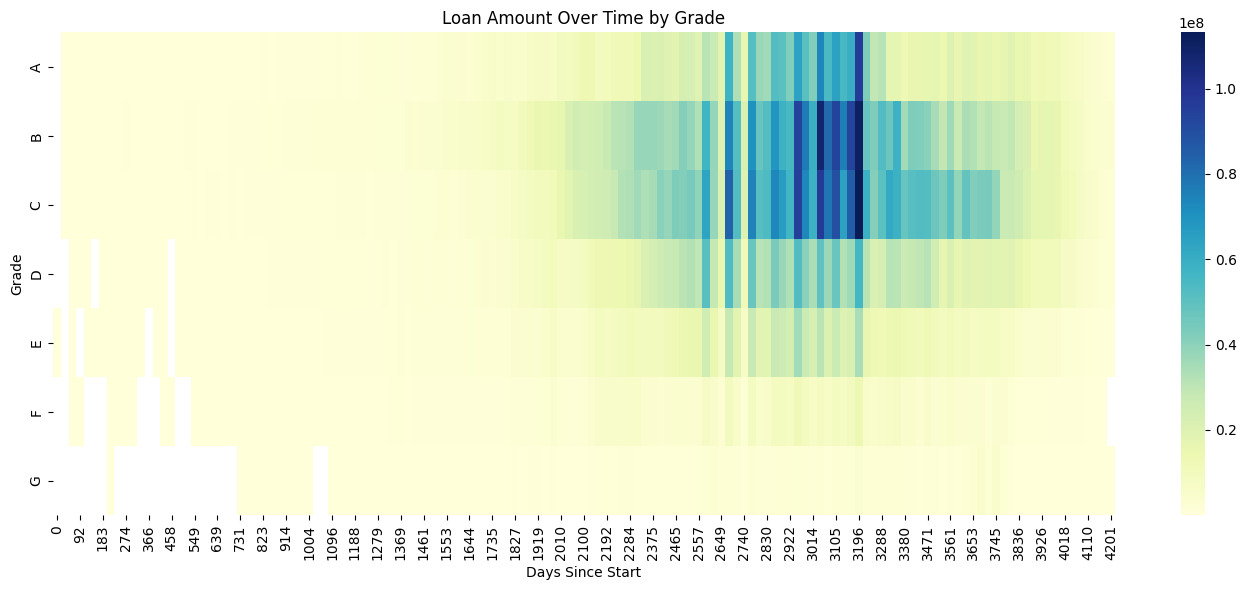

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(pivot['loanAmnt'], cmap='YlGnBu')
plt.title("Loan Amount Over Time by Grade")
plt.xlabel("Days Since Start")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()